# Programming Exercise 1: Linear Regression

The file Data/ex1data1.txt contains the dataset for a linear regression problem. The first column is the population of a city (in 10,000s) and the second column is the profit of a food truck in that city (in $10,000s).

Implement the gradient descent algorithm to find the best fit line through the points which describes the profit linearly in terms of the city population.

In [2]:
# Scientific and vector computation for python
import numpy as np

# Plotting library
import matplotlib.pyplot as plt


# Read comma separated data
path = '/Users/hassaanmuzammil/Downloads/ml-coursera-python-assignments-master/Exercise1/Data/ex1data1.txt'
data = np.loadtxt(path , delimiter=',')
X, y = data[:, 0], data[:, 1]
m = y.size  # number of training example

Text(0.5, 1.0, 'Dataset')

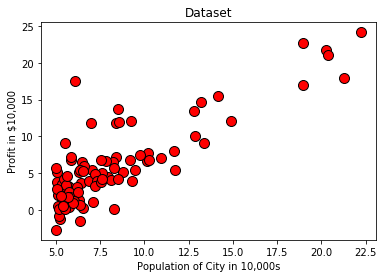

In [9]:
plt.plot(X,y,'ro',ms=10,mec='k') 
plt.ylabel('Profit in $10,000')
plt.xlabel('Population of City in 10,000s')
plt.title('Dataset')

The cost function for linear regression is given by

$$ J(\theta) = \frac{1}{2m} \sum_{i=1}^m \left( h_{\theta}(x^{(i)}) - y^{(i)}\right)^2$$
where the hypothesis $h_\theta(x)$ is given by the linear model$$ h_\theta(x) = \theta^Tx = \theta_0 + \theta_1 x_1$$

Recall that the parameters of your model are the $\theta_j$ values. These are the values you will adjust to minimize cost $J(\theta)$. One way to do this is to use the batch gradient descent algorithm. In batch gradient descent, each iteration performs the update

$$ \theta_j = \theta_j - \alpha \frac{1}{m} \sum_{i=1}^m \left( h_\theta(x^{(i)}) - y^{(i)}\right)x_j^{(i)} \qquad \text{simultaneously update } \theta_j \text{ for all } j$$
With each step of gradient descent, your parameters $\theta_j$ come closer to the optimal values that will achieve the lowest cost J($\theta$).

In [17]:
def cost_function(x,y,weight,bias):
    
    """
    Compute cost for linear regression. Computes the cost of using theta as the
    parameter for linear regression to fit the data points in X and y.
    
    Parameters
    ----------
    
    X : array_like
        The input dataset of shape (m, ), where m is the number of examples/ samples. 
    
    y : array_like
        The values of the function at each data point. This is a vector of
        shape (m, ).
    
    weight, bias : float
        The parameters for the regression function. 
        
        
    Returns
    -------
    J : float
        The value of the regression cost function.
        
    """
    
    total_error = 0.0
    for i  in range(m):
        total_error += (y[i] - (x[i] * weight + bias)) ** 2
        J = total_error / m
    return  J


In [58]:
    
def gradientDescent(X, y,weight = 0,bias = 0,iters = 3000,learning_rate = 0.01):

        
    """    
    Use the gradient descent algorithm to compute the minimum value 
    of the cost function with respect to the bias and weights.

    Parameters
    ----------

    learning_rate : for calculation of step size
    iters: number of iterations
    weight, bias: initial value of weight and bias
    X,y: dataset variables

    Returns
    -------
    weight, bias: weight and bias that lead to a minimum cost function 
    J_history: cost function values with the progression of gradient descent
    min(J_history): minimum cost function with optimized weight and bias
     
    """
    
    J_history = []
    
    for i in range(iters):
        weight_deriv = 0
        bias_deriv = 0
        for i in range(m):
            weight_deriv += -2 * X[i] * (y[i] - (weight * X[i] + bias))
            bias_deriv += -2 * (y[i] - (weight * X[i] + bias))    
            
        weight = weight -  ((weight_deriv / m) * learning_rate)
        bias = bias -  ((bias_deriv / m) * learning_rate)
        J_history.append(cost_function(X,y,weight,bias))
    
    return weight, bias, J_history, min(J_history)


Visualizing how the cost function decreases with each iteration

Minimum Cost:  8.953942753066652


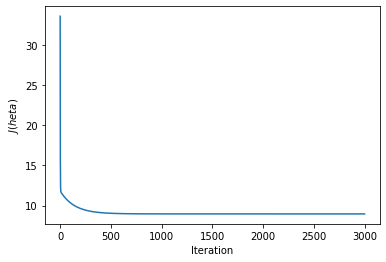

In [59]:
opt_weight, opt_bias, cost, min_cost = gradientDescent(X, y)
plt.plot(cost)
plt.xlabel("Iteration")
plt.ylabel("$ J(\theta)$")
print("Minimum Cost: ",min_cost)

Plotting the best fit line through the data points

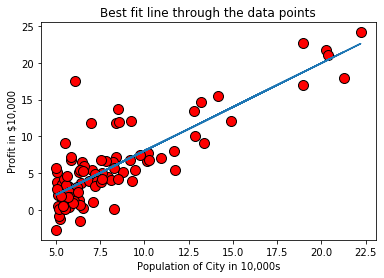

In [60]:
plt.plot(X,y,'ro',ms=10,mec='k')
plt.plot(X,opt_weight*X+opt_bias)
plt.ylabel('Profit in $10,000')
plt.xlabel('Population of City in 10,000s')
plt.title('Best fit line through the data points')
plt.show()

Optimized parameters

In [61]:
print("Optimized weight: ",opt_weight)
print("Optimized bias: ",opt_bias)

Optimized weight:  1.1930257781179299
Optimized bias:  -3.895702578437696


Predicting the profit given population of city 

In [62]:
#test value : 18.945,22.638
print("Predicted profit in 10,000s given population of 18.945 in 10,000s: ",opt_weight*18.945+opt_bias)
print("Actual profit in 10,000s given population of 18.945 in 10,000s: $22.638")
#test value: 12.828,13.501
print("Predicted profit in 10,000s given population of 12.828 in 10,000s: ",opt_weight*12.828+opt_bias)
print("Actual profit in 10,000s given population of 12.828 in 10,000s: $13.501")

Predicted profit in 10,000s given population of 18.945 in 10,000s:  18.706170788006485
Actual profit in 10,000s given population of 18.945 in 10,000s: $22.638
Predicted profit in 10,000s given population of 12.828 in 10,000s:  11.408432103259107
Actual profit in 10,000s given population of 12.828 in 10,000s: $13.501


# Programming Exercise 2: Multiple Linear Regression

The file ex1data2.txt contains a training set of housing prices in Port- land, Oregon. The first column is the size of the house (in square feet), the second column is the number of bedrooms, and the third column is the price of the house.


In [146]:
#Loading data
path = '/Users/hassaanmuzammil/Downloads/ml-coursera-python-assignments-master/Exercise1/Data/ex1data2.txt'
data = np.loadtxt(path , delimiter=',')
X, y = data[:, 0:2], data[:, 2]
m = y.size  # number of training example

#Mean and Standard Deviation used later in prediction of house prices
mean1 = np.mean(X[:,0])
mean2 = np.mean(X[:,1])
std1 = np.std(X[:,0])
std2 = np.std(X[:,1])

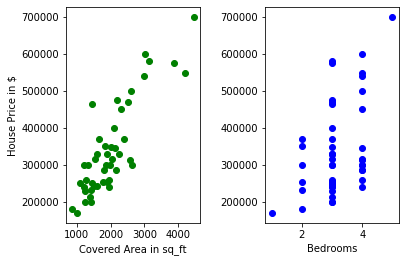

In [158]:
#Visualizing the data
plt.subplot(1,2,1)
plt.scatter(X[:,0],y,c='g')
plt.xlabel("Covered Area in sq_ft")
plt.ylabel("House Price in $")
plt.subplot(1,2,2)
plt.scatter(X[:,1],y,c='b')
plt.xlabel("Bedrooms")
plt.tight_layout(pad=2, w_pad=2, h_pad=1.0)
plt.show()

Previously, we implemented gradient descent on a univariate regression problem. The only difference now is that there is one more feature in the matrix $X$. The hypothesis function and the batch gradient descent update rule remain unchanged.

The functions computeCostMulti and gradientDescentMulti implement the cost function and gradient descent for linear regression with multiple variables. 



In [90]:
def computeCostMulti(X, y, theta): #X -> (ones column part of X)
    """
    Compute cost for linear regression with multiple variables.
    Computes the cost of using theta as the parameter for linear regression to fit the data points in X and y.
    
    Parameters
    ----------
    X : array_like
        The dataset of shape (m x n+1).
        The ones column  (for bias is included in X.
    
    y : array_like
        A vector of shape (m, ) for the values at a given data point.
    
    theta : array_like
        The linear regression parameters. A vector of shape (n+1, )
    
    Returns
    -------
    J : float
        The value of the cost function. 
    
    Instructions
    ------------
    Compute the cost of a particular choice of theta. You should set J to the cost.
    """
    # Initialize some useful values
    m = y.shape[0] # number of training examples
    
    # You need to return the following variable correctly
    J = 0
    
    # Add a column of ones to X. The numpy function stack joins arrays along a given axis. 
    # The first axis (axis=0) refers to rows (training examples) 
    # and second axis (axis=1) refers to columns (features).
    
    h = hypothesis(theta,X)
    
    for i in range(m):
        J += (h - y)[i] ** 2

    return (J / m)

Hypothesis function predicts a value of y given an X entry and theta 

In [91]:
def hypothesis(theta, X):   #X -> (ones column part of X)
    
    h = np.ones(X.shape[0])
    y_pred = theta * X
    for i in range(m):
        h[i] = sum(y_pred[i])
    return h

By looking at the values, note that house sizes are about 1000 times the number of bedrooms. When features differ by orders of magnitude, first performing feature scaling can make gradient descent converge much more quickly.
One such way is to normalize the dataset. 

                      Normalizing equation: z = (x - mean) / std

In [129]:
def normalize(X_train):
    
    """
    Normalizes the features in X. returns a normalized version of X where
    the mean value of each feature is 0 and the standard deviation
    is 1. This is often a good preprocessing step to do when working with
    learning algorithms.
    
    Normalized value z calculated by formula
    z = (x - mu / sigma)
    """
    mean = np.ones(X_train.shape[1])     
    std = np.ones(X_train.shape[1])
    for i in range(0, X_train.shape[1]):
        mean[i] = np.mean(X_train.transpose()[i])
        std[i] = np.std(X_train.transpose()[i])
        for j in range(0, X_train.shape[0]):
            X_train[j][i] = (X_train[j][i] - mean[i])/std[i]
    return X_train


In [130]:
def BGD(theta, learning_rate, num_iters, X, y):
    '''
    Calculates the optimized theta from an initial theta
    Keeps track of the cost history with each iteration
    '''
    cost = [1] * num_iters
    h = hypothesis(theta,X)
    grad = [0]*3
    theta = list(theta)
    print('Initial Theta:',theta)
    for i in range(num_iters):
        for j in range(len(grad)):
            grad[j] = sum((2 / m) * (h - y) * (X[:,j]))
            
        theta[0] = theta[0] - learning_rate * grad[0]
        theta[1] = theta[1] - learning_rate * grad[1]
        theta[2] = theta[2] - learning_rate * grad[2]
        
        h = hypothesis(theta,X)
        cost[i] = computeCostMulti(X, y, np.array(theta))
    
    theta = np.array(theta)
    minimum_cost = computeCostMulti(X, y, theta)
    
    return theta, minimum_cost, cost

We have to add a ones column to X that corresponds to the bias entry in the theta vector. 
Then we will normalize X columns
Run the Batch Gradient Descent Algorithm
Extract the cost history and the optimized theta

In [131]:
def multi_linear_regression(X, y, alpha, num_iters):

    n = X.shape[1]
    ones_column = np.ones((X.shape[0],1))
    X = normalize(X)
    X = np.concatenate((ones_column, X), axis = 1)
    
    # initializing the parameter vector...
    theta = np.zeros(n+1)
    
    # returning the optimized parameters by Gradient Descent...
    return BGD(theta,alpha,num_iters,X,y)
    

Initial Theta: [0.0, 0.0, 0.0]
Optimized Theta:  [340412.65957447 109447.79646964  -6578.35485416]
Minimum loss function:  4086560101.205656


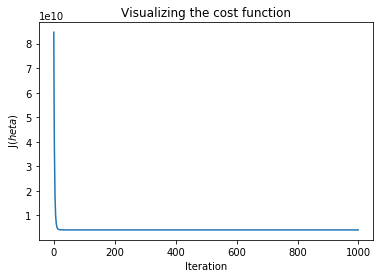

In [132]:
theta,minimum_cost,cost = multi_linear_regression(X, y, 0.1, 1000)
plt.plot(cost)
plt.title("Visualizing the cost function")
plt.xlabel("Iteration")
plt.ylabel(" J($\theta$)")
print('Optimized Theta: ', theta)
print('Minimum loss function: ',minimum_cost)

Predicting House Prices

In [133]:
#Test case
sq_ft = 1600
br = 3
X_test = np.array([1,(sq_ft-mean1)/std1,(br-mean2)/std2])
price = sum(X_test*theta)

print('Predicted price of a 1600 sq-ft, 3 br house (using normal equations): ${:.0f}'.format(price))
print('From Dataset..')
print('Actual price of a 1600 sq-ft, 3 br house: ${:.0f}'.format(329900))

Predicted price of a 1600 sq-ft, 3 br house (using normal equations): $286121
From Dataset..
Actual price of a 1600 sq-ft, 3 br house: $329900
